# Análisis de distribuciones de tiempos de cómputo

## Índice

- **1. Objetivo del trabajo**
- **2. Introducción**

- **3. Estadística Descriptiva**
    - 3.1. Visualización de los datos
    - 3.2. Distribuciones subyacentes
    - 3.3. Cálculo de estadísticos descriptivos   

- **4. Inferencia**
    - 4.1. Tests de normalidad  
    - 4.2. Tests estadísticos  
    - 4.3. Regresión lineal  


## 1. Ojetivo Trabajo
El objetivo de este trabajo es analizar estadísticamente los tiempos de ejecución del algoritmo de Fibonacci, realizar comparaciones entre las variables involucradas y explorar posibles distribuciones de los datos.

## 2. Introducción
La forma más sencilla de medir el tiempo de ejecución de un algoritmo es utilizando funciones provistas por el sistema operativo o el lenguaje de programación, que permiten obtener la hora del sistema antes y después de ejecutar el algoritmo. La diferencia entre ambos tiempos proporciona una estimación del tiempo que tardó en ejecutarse el algoritmo, generalmente expresado en milisegundos.

En este trabajo se emplean dos conceptos de medición: medición simple y medición en lote. La medición simple consiste en ejecutar la función una sola vez y registrar el tiempo obtenido. Por otro lado, la medición en lote consiste en ejecutar la función m veces y luego calcular el promedio de todas esas mediciones. A lo largo del trabajo, m
se refiere al batch size o medición en lote, y n representa el número de entrada que recibe la función de Fibonacci.

Asimismo, se aplicarán herramientas estadísticas para analizar los resultados y comparar las variables involucradas.

## 3.Estadistica Descriptiva


### 3.1 Visualización de los datos
Antes que nada queremos entender los datos que recolectamos y hacernos preguntas, como por ejemplo si el tiempo de computo es una variable aleatoria o es determinista. A continuación se pueden observar gráficos muestran lo mencionado.

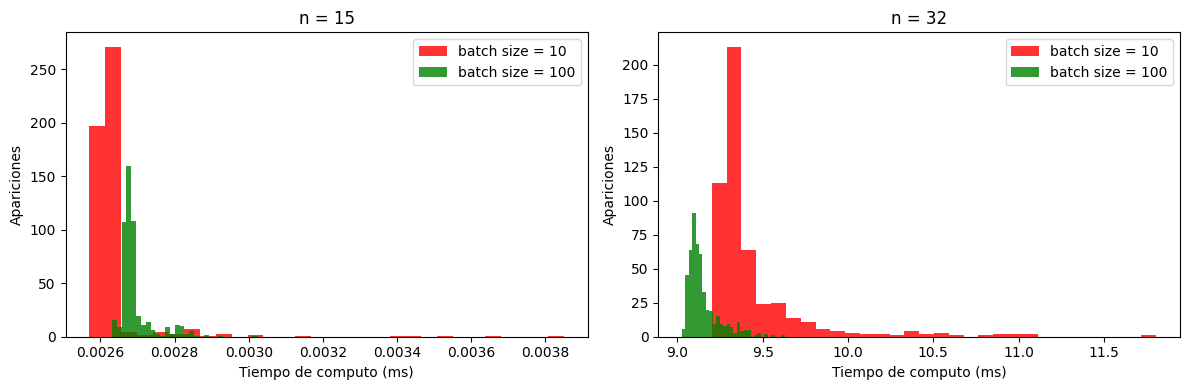

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_json("bench_fib2.json")
#Queremos evaluar si el tiempo de ejecucion es una variable aleatoria. Es decir que su valor no es determinista
#Evaluemos primero para cierto n elejido elegido.

df1 = df[(df["n"] == 15) & (df["batch_size"] == 10)].sample(n=500, random_state=42)
df2 = df[(df["n"] == 15) & (df["batch_size"] == 100)].sample(n=500, random_state=42)
df3 = df[(df["n"] == 32) & (df["batch_size"] == 10)].sample(n=500, random_state=42)
df4 = df[(df["n"] == 32) & (df["batch_size"] == 100)].sample(n=500, random_state=42)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(df1["time_ms"], 30, alpha=0.8, label='batch size = 10', color='red')
axs[0].hist(df2["time_ms"], 30, alpha=0.8, label='batch size = 100', color='green')
axs[0].set_xlabel("Tiempo de computo (ms)")
axs[0].set_ylabel("Apariciones")
axs[0].set_title("n = 15")
axs[0].legend()

axs[1].hist(df3["time_ms"], 30, alpha=0.8, label='batch size = 10', color='red')
axs[1].hist(df4["time_ms"], 30, alpha=0.8, label='batch size = 100', color='green')
axs[1].set_xlabel("Tiempo de computo (ms)")
axs[1].set_ylabel("Apariciones")
axs[1].set_title("n = 32")
axs[1].legend()

fig.tight_layout()
plt.show()


El primer gráfico, con n = 10, muestra una distribución del tiempo concentrada en valores más bajos, tanto para un batch size de 10 como de 100. Los casos en los que el tiempo supera los 0.0030 ms son muy pocos. Por otro lado, para un n mayor, como en el segundo gráfico, se observa una distribución que tiende a ser más normal, con valores centrados alrededor de 9.1 ms.

Los sistemas computacionales, si bien son deterministas, poseen una gran cantidad de variables, subprocesos y estados posibles; por ello, ejecutar una función en distintos momentos puede arrojar tiempos de ejecución diferentes. Dependiendo de los procesos que esté realizando el procesador, el tiempo de cómputo de la función de Fibonacci puede verse afectado.

A medida que tarda más en calcular la función, aumenta la probabilidad de que haya mayores diferencias entre los subprocesos, lo que genera una distribución menos concentrada y con forma de campana. Como conclusión, dado que el tiempo de ejecución no es determinista, podemos considerarlo una variable aleatoria.

### 3.2 Distribuciones subyacentes

Queremos ver si graficando podemos descubrir alguna distribución conocida

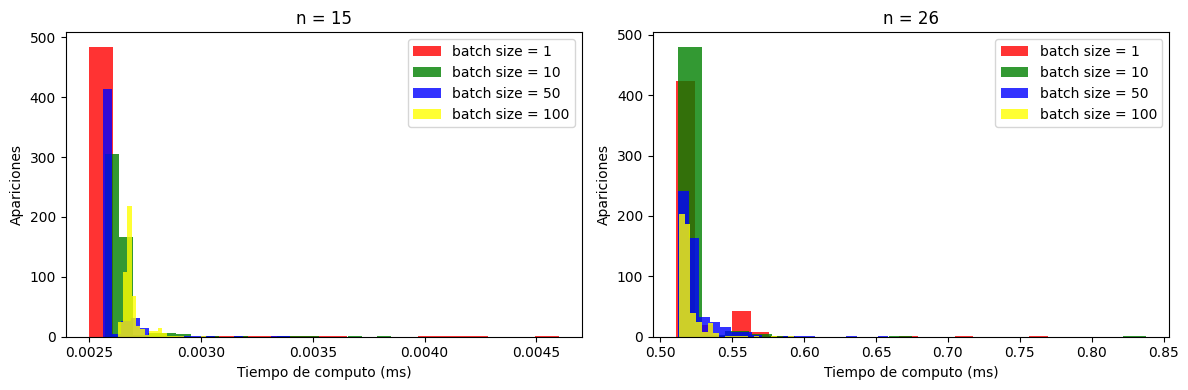

In [ ]:
df1 = df[(df["n"] == 15) & (df["batch_size"] == 1)].sample(n=500, random_state=42)
df2 = df[(df["n"] == 15) & (df["batch_size"] == 10)].sample(n=500, random_state=42)
df3 = df[(df["n"] == 15) & (df["batch_size"] == 50)].sample(n=500, random_state=42)
df4 = df[(df["n"] == 15) & (df["batch_size"] == 100)].sample(n=500, random_state=42)

df5 = df[(df["n"] == 26) & (df["batch_size"] == 1)].sample(n=500, random_state=42)
df6 = df[(df["n"] == 26) & (df["batch_size"] == 10)].sample(n=500, random_state=42)
df7 = df[(df["n"] == 26) & (df["batch_size"] == 50)].sample(n=500, random_state=42)
df8 = df[(df["n"] == 26) & (df["batch_size"] == 100)].sample(n=500, random_state=42)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(df1["time_ms"], 20, alpha=0.8, label='batch size = 1', color='red')
axs[0].hist(df2["time_ms"], 20, alpha=0.8, label='batch size = 10', color='green')
axs[0].hist(df3["time_ms"], 20, alpha=0.8, label='batch size = 50', color='blue')
axs[0].hist(df4["time_ms"], 20, alpha=0.8, label='batch size = 100', color='yellow')
axs[0].set_xlabel("Tiempo de computo (ms)")
axs[0].set_ylabel("Apariciones")
axs[0].set_title("n = 15")
axs[0].legend()

axs[1].hist(df5["time_ms"], 20, alpha=0.8, label='batch size = 1', color='red')
axs[1].hist(df6["time_ms"], 20, alpha=0.8, label='batch size = 10', color='green')
axs[1].hist(df7["time_ms"], 20, alpha=0.8, label='batch size = 50', color='blue')
axs[1].hist(df8["time_ms"], 20, alpha=0.8, label='batch size = 100', color='yellow')
axs[1].set_xlabel("Tiempo de computo (ms)")
axs[1].set_ylabel("Apariciones")
axs[1].set_title("n = 26")
axs[1].legend()

fig.tight_layout()
plt.show()

Se puede observar que al aumentar el batch size disminuye la variabilidad de los datos de la muestra. Para ambos n, la muestra de mediciones individuales cuenta con muchos más datos atípicos que las muestras para batch size mayores. Esto puede deberse a que el impacto de una interrupción o tardanza anormal en el calculo impacta fuertemente a las muestras individuales mientras que es "diluida" al aumentar el batch size, ya que es menos probable que la misma interrupción afecte los 10 o 50 intentos seguidos.

Para visualizar esto un poco mejor vamos a usar violin plots (Ibamos a usar boxplots pero no se veían bien):

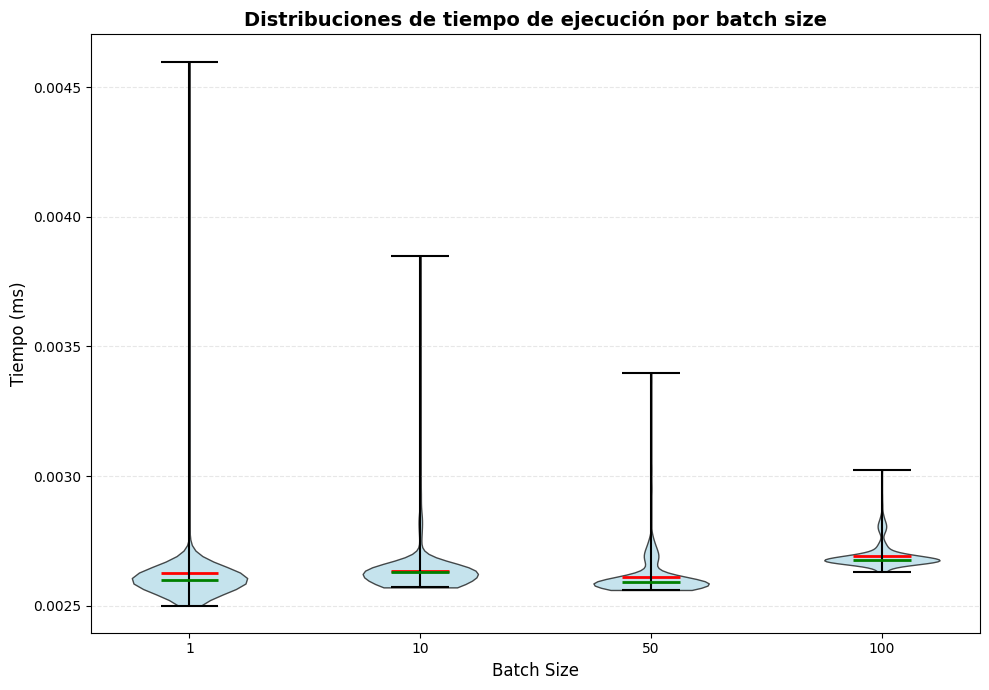

In [ ]:
d = [df1["time_ms"], df2["time_ms"], df3["time_ms"], df4["time_ms"]]

fig, ax = plt.subplots(figsize=(10, 7))

# Create violin plot
parts = ax.violinplot(d,
                      showmeans=True,
                      showmedians=True,
                      showextrema=True)

# Customize colors
for pc in parts['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Customize other elements
parts['cmeans'].set_edgecolor('red')
parts['cmeans'].set_linewidth(2)
parts['cmedians'].set_edgecolor('green')
parts['cmedians'].set_linewidth(2)
parts['cbars'].set_edgecolor('black')
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')

# Labels and formatting
ax.set_xlabel('Batch Size', fontsize=12)
ax.set_ylabel('Tiempo (ms)', fontsize=12)
ax.set_title('Distribuciones de tiempo de ejecución por batch size', fontsize=14, fontweight='bold')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['1', '10', '50', '100'])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


Acá se ve claramente como el rango de la distribución va disminuyendo a medida que el batch size aumenta. En mayor medida, los valores más afectados son los tiempos de ejecución más largos, lo que fortalece la hipótesis de que las interrupciones que causan ejecuciones anormalmente largas se "diluyen" dentro de grandes lotes.

### 3.2 Calculo de estadísticos descriptivos

Siguiendo con la estadística descriptiva nos interesa comparar estadísticos entre los distintos lotes. Para ello a continuación se puede ver una tabla con dichas mediciones.

In [ ]:
import numpy as np
import pandas as pd

batch_sizes = [1, 5, 10, 50, 70, 100]
ns = [2, 4, 8, 10, 15, 20, 26, 32]
resultados = []

for batch_size in batch_sizes:
    for n in ns:
        df1 = df[(df["n"] == n) & (df["batch_size"] == batch_size)]
        datos = np.array(df1["time_ms"])
        media = datos.sum() / len(datos)
        desviacion_estandar = np.std(np.array(datos))
        mediana = np.median(datos)
        intercuartil = np.percentile(datos, 75) - np.percentile(datos, 25)

        resultados.append({
            "n": n,
            "batch_size": batch_size,
            "media": media,
            "desviacion_estandar": desviacion_estandar,
            "mediana": mediana,
            "intercuartil": intercuartil
        })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Crear 4 tablas pivot (una por estadística)
print("=" * 80)
print("MEDIA")
print("=" * 80)
tabla_media = df_resultados.pivot(index='n', columns='batch_size', values='media')
print(tabla_media.to_string())

print("\n" + "=" * 80)
print("DESVIACIÓN ESTÁNDAR")
print("=" * 80)
tabla_std = df_resultados.pivot(index='n', columns='batch_size', values='desviacion_estandar')
print(tabla_std.to_string())


MEDIA
batch_size       1         5         10        50        70        100
n                                                                     
2           0.000024  0.000009  0.000009  0.000005  0.000005  0.000004
4           0.000030  0.000016  0.000019  0.000012  0.000013  0.000012
8           0.000204  0.000091  0.000088  0.000086  0.000086  0.000092
10          0.000247  0.000238  0.000234  0.000231  0.000233  0.000245
15          0.002622  0.002647  0.002641  0.002609  0.002635  0.002695
20          0.029087  0.029614  0.029316  0.028915  0.029304  0.029468
26          0.523353  0.529690  0.521443  0.523794  0.520946  0.519987
32          9.319428  9.338311  9.444781  9.291732  9.147834  9.147728

DESVIACIÓN ESTÁNDAR
batch_size       1         5         10        50        70            100
n                                                                         
2           0.000043  0.000018  0.000004  0.000001  0.000001  8.935748e-07
4           0.000046  0.000008  0.0000

Acá se fortalece nuevamente la teoría del impacto de los batch size, ya que podemos observar como la desviación estándar, la cual mide la dispersión del conjunto de datos, disminuye a medida que aumenta el batch size.

In [ ]:
print("\n" + "=" * 80)
print("MEDIANA")
print("=" * 80)
tabla_mediana = df_resultados.pivot(index='n', columns='batch_size', values='mediana')
print(tabla_mediana.to_string())

print("\n" + "=" * 80)
print("RANGO INTERCUARTIL")
print("=" * 80)
tabla_iqr = df_resultados.pivot(index='n', columns='batch_size', values='intercuartil')
print(tabla_iqr.to_string())


MEDIANA
batch_size      1        5         10        50        70        100
n                                                                   
2           0.00000  0.00000  0.000010  0.000004  0.000004  0.000004
4           0.00000  0.00002  0.000020  0.000012  0.000013  0.000012
8           0.00010  0.00010  0.000090  0.000086  0.000086  0.000093
10          0.00020  0.00024  0.000230  0.000230  0.000233  0.000235
15          0.00260  0.00264  0.002630  0.002592  0.002618  0.002681
20          0.02890  0.02903  0.029000  0.028766  0.028963  0.028945
26          0.51800  0.52298  0.518675  0.519768  0.518286  0.518193
32          9.28225  9.29414  9.337395  9.303046  9.118244  9.117331

RANGO INTERCUARTIL
batch_size     1        5         10        50        70            100
n                                                                      
2           0.0000  0.00002  0.000000  0.000002  0.000001  1.000000e-06
4           0.0001  0.00000  0.000000  0.000000  0.000000  0.0000

## 4. Inferencia
### 4.1 Test de normalidad
Nos interesa poder testear si efectivamente las distribuciones que obtuvimos provienen de una distribución normal como intuíamos a partir de los gráficos. Realizaremos tests de normalidad para poder llegar a una conclusión basada en los datos.
Planteamos las siguientes hipótesis:

H0 = la distribución no proviene de una muestra normal <br>
H1 = la distribución proviene de una muestra normal

 Usaremos el test de normalidad de Shapiro-Wilks y de Kolmogorov eligiendo un nivel de confianza estandar del 0.05.

/tmp/ipython-input-357536021.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # deja espacio para el colorbar


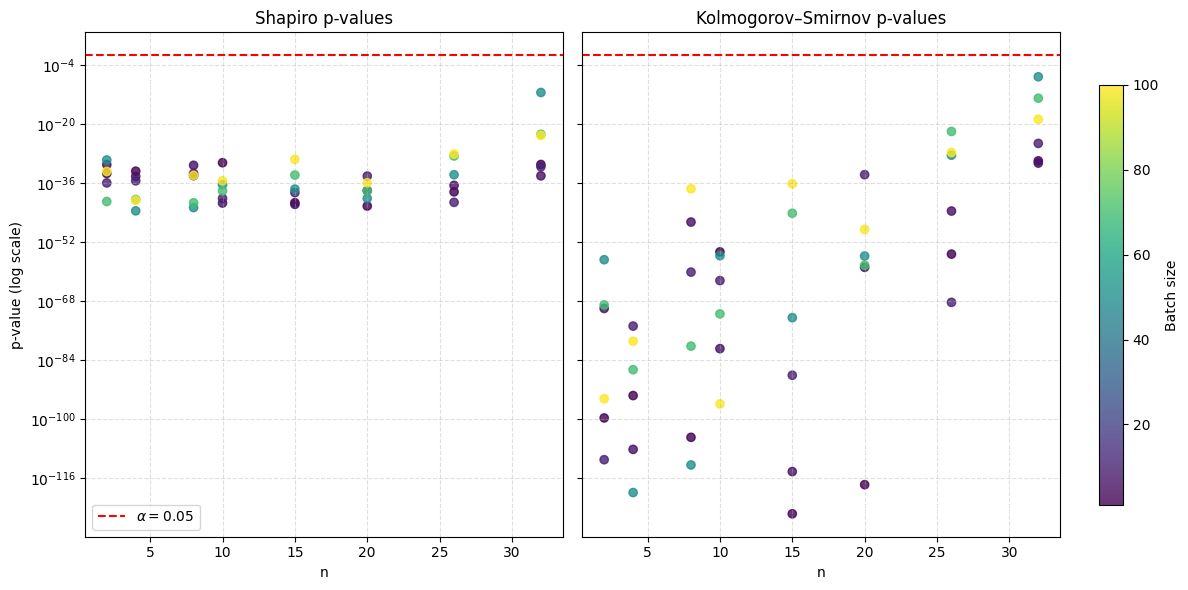

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest

ns = sorted(df["n"].unique())
batch_sizes = sorted(df["batch_size"].unique())

# Resultados para ambos tests
p_shapiro_vals = []
p_ks_vals = []
n_values = []
batch_values = []

SAMPLE_SIZE = 500

for n in ns:
    for batch_size in batch_sizes:
        data = df[(df["n"] == n) & (df["batch_size"] == batch_size)]["time_ms"]

        if len(data) > SAMPLE_SIZE:
            data = np.random.choice(data, SAMPLE_SIZE, replace=False)

        # Shapiro
        _, p_shapiro = shapiro(data)

        # Kolmogorov ajustada
        mu, sigma = np.mean(data), np.std(data, ddof=1)
        _, p_ks = kstest(data, 'norm', args=(mu, sigma))

        p_shapiro_vals.append(p_shapiro)
        p_ks_vals.append(p_ks)
        n_values.append(n)
        batch_values.append(batch_size)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax.set_facecolor("#cacaca")


sc1 = axes[0].scatter(
    n_values, p_shapiro_vals,
    c=batch_values,
    cmap="viridis",
    alpha=0.8
)
axes[0].axhline(0.05, color='red', linestyle='--', label=r"$\alpha = 0.05$")
axes[0].legend()
axes[0].set_title("Shapiro p-values")
axes[0].set_xlabel("n")
axes[0].set_ylabel("p-value (log scale)")
axes[0].set_yscale('log')
axes[0].grid(True, which="both", ls="--", alpha=0.4)

# --- KS ---
sc2 = axes[1].scatter(
    n_values, p_ks_vals,
    c=batch_values,
    cmap="viridis",

    alpha=0.8
)
axes[1].axhline(0.05, color='red', linestyle='--')
axes[1].set_title("Kolmogorov–Smirnov p-values")
axes[1].set_xlabel("n")
axes[1].set_yscale('log')
axes[1].grid(True, which="both", ls="--", alpha=0.4)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sc2, cax=cbar_ax)
cbar.set_label("Batch size")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # deja espacio para el colorbar
plt.show()



Ninguno de los tests realizados arrojó un p-value superior a 0,05 y quedaron muy lejos de hacerlo, por lo tanto en todos los casos se rechazó la hipótesis nula. Esto indica que es muy poco probable que las distribuciones analizadas provengan de una distribución normal.

Sin embargo, se observó que, a medida que aumenta el valor de n, también lo hace la desviación estándar, y la forma de la distribución comienza a asemejarse a una curva con forma de campana. Esto sugiere que, para valores de n mayores a 30, es posible que alguno de los tests utilizados arroje p-values superiores al umbral de 0,05, dejando de rechazar la hipótesis nula. De hecho el valor que mas cerca estuvo de superar el umbral fue n = 32.



### 4.2 T-test estadisticos
#### Comparación de medias
Seria Interesante poder estudiar la relación entre un n y sus distintos batch sizes. Mas específicamente preguntarnos si existen diferencias significativas en las medias entre la medición simple (batch size = 1) y la medición en lote (batch size > 1).

Vamos a realizar un T-test o también llamado test de Student.
Planteamos las siguiente hipótesis nula:

H0 = la diferencia de la media entre muestra en lote y simple es practicante nula <br>
Ha = la diferencia de la media entre muestra en lote y simple es distinta de 0

Calculamos el T score el cual es un ratio de como 2 grupos difieren cuando comparamos diferencias en las observaciones de cada uno. Se calcula de la siguiente manera:

$$
T = \frac{\bar{X}_1 - \bar{X}_2 - 0}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$


$$
s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
$$



Para realizar este test se deben cumplir ciertas condiciones.
1. Las observaciones son independientes entre los grupos a comparar
2. Tener muestras grandes y no tener outliers muy extremos

Por la forma en que esta construido el script ninguno de los tiempos medidos depende del anterior. Por ende el primer punto esta cubierto.<br>
Ademas, tenemos muestras considerablemente grandes y no tenemos outliers muy extremos como indica el 2 punto. <br>
Aclarado esto calculemos los T-scores y el p-values para todos los n. Se pidió de todas formas que se ignoren dichas suposiciones y se realice de todas formas




/tmp/ipython-input-2433067113.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


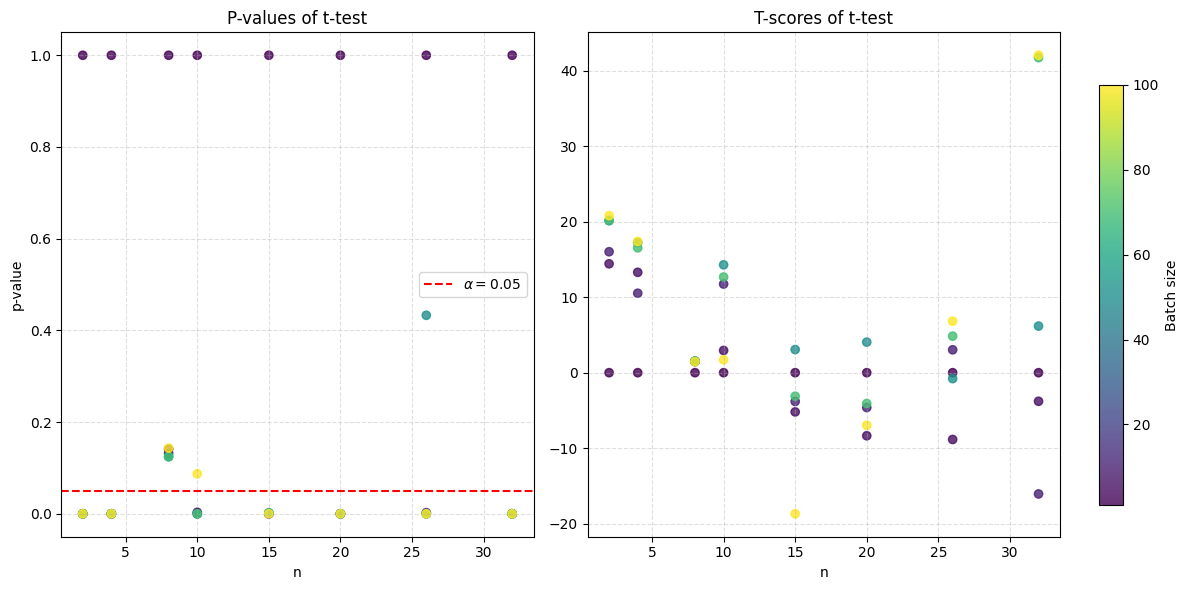

In [ ]:
from scipy.stats import ttest_ind

T = []
p_values = []
batch_values = []
n_values = []

for n in ns:
    simple = df[(df["n"] == n) & (df["batch_size"] == 1)]["time_ms"]
    for batch in batch_sizes:
        lote = df[(df["n"] == n) & (df["batch_size"] == batch)]["time_ms"]

        t_stat, p_value = ttest_ind(simple, lote)
        T.append(t_stat)
        p_values.append(p_value)
        n_values.append(n)
        batch_values.append(batch)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sc1 = axes[0].scatter(
    n_values, p_values,
    c=batch_values,
    cmap="viridis",
    alpha=0.8
)
axes[0].axhline(0.05, color='red', linestyle='--', label=r"$\alpha = 0.05$")
axes[0].legend()
axes[0].set_title("P-values of t-test")
axes[0].set_xlabel("n")
axes[0].set_ylabel("p-value")
axes[0].grid(True, which="both", ls="--", alpha=0.4)

sc2 = axes[1].scatter(
    n_values, T,
    c=batch_values,
    cmap="viridis",
    alpha=0.8
)
axes[1].set_title("T-scores of t-test")
axes[1].set_xlabel("n")
axes[1].grid(True, which="both", ls="--", alpha=0.4)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sc2, cax=cbar_ax)
cbar.set_label("Batch size")


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


Como era de esperarse, el p-value vale 1 cuando se compara una muestra consigo misma (puntos violetas mas oscuros). Para todos los valores de n, excepto n = 10 y n = 8, al comparar la medición simple con la de un lote de tamaño 100, el p-value quedó por debajo del umbral de significancia, lo que indica que existe una diferencia significativa entre las medias de ambos grupos.<br><br>
El caso raro es n = 10: al compararlo con un lote de 100, el p-value supera el umbral de 0.05, sugiriendo que no hay diferencia significativa, sin embargo, al compararlo con un lote de tamaño 10, el p-value sí cae por debajo del umbral.
El otro caso donde no se observa diferencia significativa entre las medias es con n = 8. Todos los batch sizes dieron un p value por encima del umbral Se podría pensar que n al ser muy bajo variabilidad no se alcanza a reflejar en tiempos cortos de computo. Sin embargo, esto queda inmediatamente refutado al observar que para n = 2 o n = 4 existe gran variabilidad respecto a los mismo tamaños de lote.
Por lo tanto la única explicación que se le encontró es que ocurrió alguna anomalía en el scheduler/cpu al momento de generar los datos. Sino no se explica porque da valores tan distintos a los de sus enes vecinos.<br><br>-Observación:
En el gráfico de la izquierda, para algunos valores de n, se observan pocos puntos en lugar de la cantidad de batch size distintos disponibles. Al revisar los t-scores, notamos que estos puntos presentan valores muy altos, lo que provoca que se superpongan entre si a la altura del 0.<br>

En conclusión, sin contar los casos atípicos, las comparaciones muestran diferencias significativas entre la medición simple y los lotes, como era de esperarse.

# Regresión Lineal

n=8: beta_0 = -0.000032, beta_1 = 0.000090, sigma_ruido = 0.000159
n=15: beta_0 = -0.000782, beta_1 = 0.002674, sigma_ruido = 0.002004


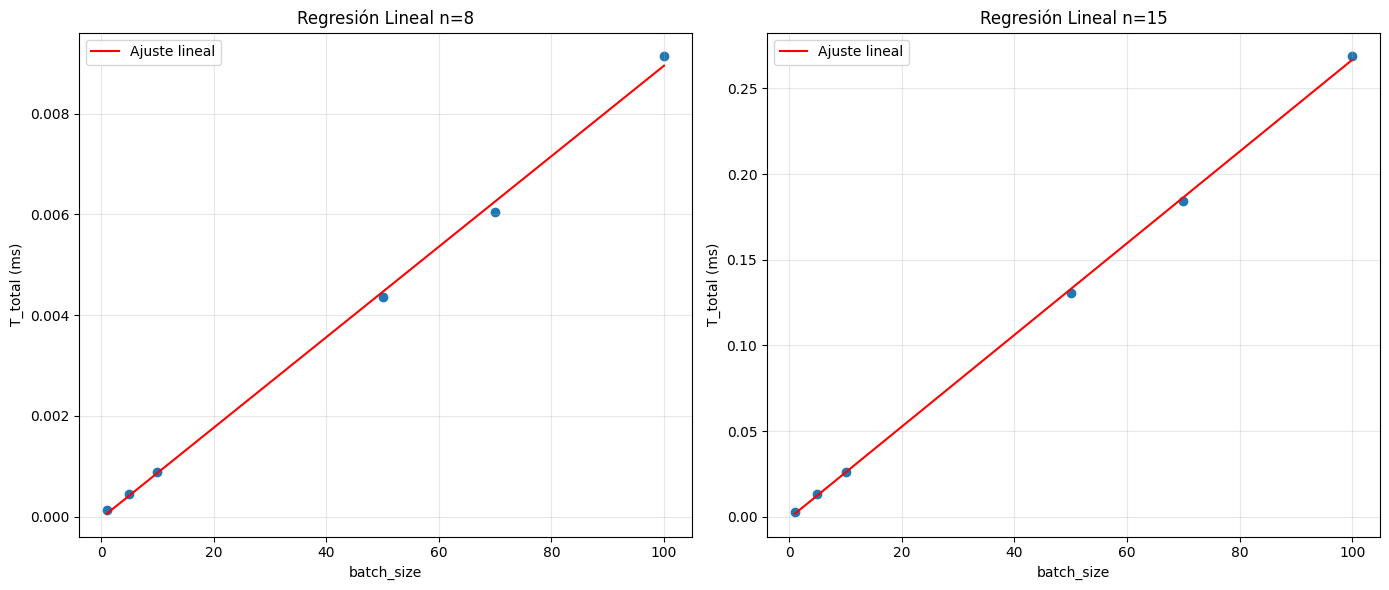

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === n=8, N=1000 ===
df_n8 = df[df['n'] == 8].sample(n=1000, random_state=42)
grouped = df_n8.groupby('batch_size')['time_ms'].mean().reset_index()
grouped['T_total'] = grouped['time_ms'] * grouped['batch_size']  # TIEMPO TOTAL

x = grouped['batch_size'].values
y = grouped['T_total'].values
N = len(x)

beta_1_hat = np.cov(x, y)[0,1] / np.var(x, ddof=1)
beta_0_hat = np.mean(y) - beta_1_hat * np.mean(x)
sigma_ruido_hat = np.sqrt(np.sum((y - beta_0_hat - beta_1_hat * x)**2) / (N - 2))

print(f'n=8: beta_0 = {beta_0_hat:.6f}, beta_1 = {beta_1_hat:.6f}, sigma_ruido = {sigma_ruido_hat:.6f}')

axes[0].scatter(x, y)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = beta_0_hat + beta_1_hat * x_fit
axes[0].plot(x_fit, y_fit, color='red', label='Ajuste lineal')
axes[0].set_xlabel('batch_size')
axes[0].set_ylabel('T_total (ms)')
axes[0].set_title('Regresión Lineal n=8')
axes[0].legend()
axes[0].grid(alpha=0.3)

# === n=15, N=1000 ===
df_n15 = df[df['n'] == 15].sample(n=1000, random_state=42)
grouped = df_n15.groupby('batch_size')['time_ms'].mean().reset_index()
grouped['T_total'] = grouped['time_ms'] * grouped['batch_size']  # TIEMPO TOTAL

x = grouped['batch_size'].values
y = grouped['T_total'].values
N = len(x)

beta_1_hat = np.cov(x, y)[0,1] / np.var(x, ddof=1)
beta_0_hat = np.mean(y) - beta_1_hat * np.mean(x)
sigma_ruido_hat = np.sqrt(np.sum((y - beta_0_hat - beta_1_hat * x)**2) / (N - 2))

print(f'n=15: beta_0 = {beta_0_hat:.6f}, beta_1 = {beta_1_hat:.6f}, sigma_ruido = {sigma_ruido_hat:.6f}')

axes[1].scatter(x, y)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = beta_0_hat + beta_1_hat * x_fit
axes[1].plot(x_fit, y_fit, color='red', label='Ajuste lineal')
axes[1].set_xlabel('batch_size')
axes[1].set_ylabel('T_total (ms)')
axes[1].set_title('Regresión Lineal n=15')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

n=10: beta_0 = -0.000146, beta_1 = 0.000242, sigma_ruido = 0.000405
n=26: beta_0 = 0.045077, beta_1 = 0.520213, sigma_ruido = 0.079690


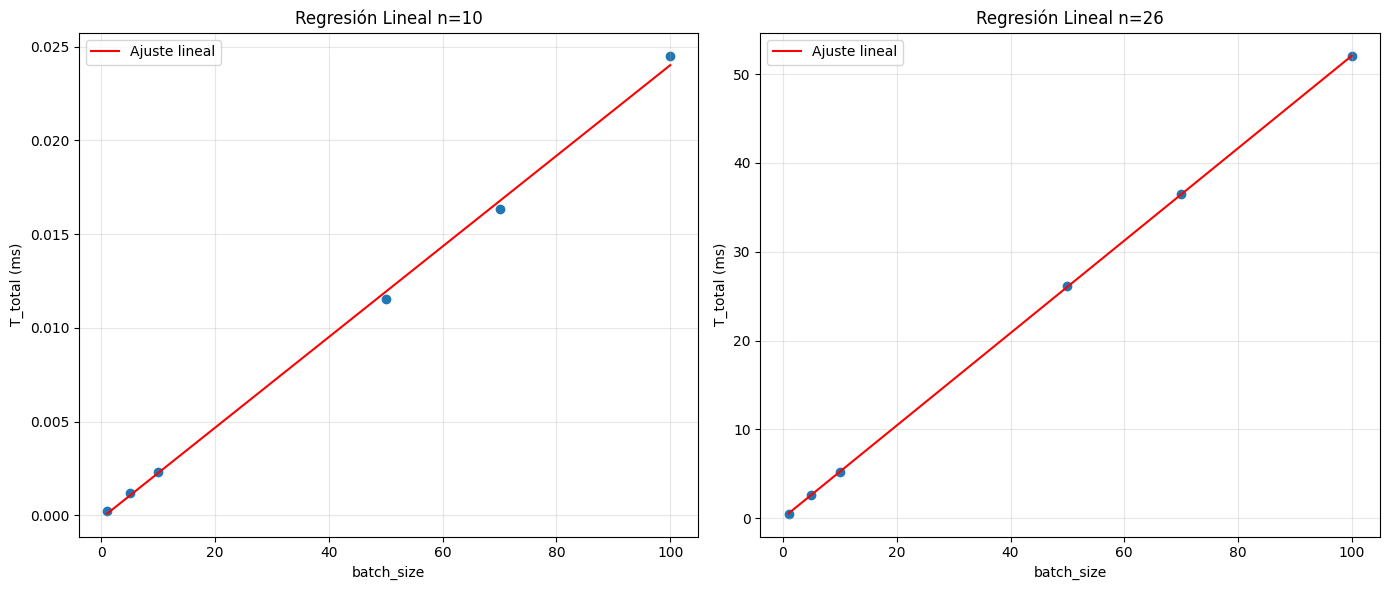

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === n=10, N=2000 ===
df_n8 = df[df['n'] == 10]
grouped = df_n8.groupby('batch_size')['time_ms'].mean().reset_index()
grouped['T_total'] = grouped['time_ms'] * grouped['batch_size']  # TIEMPO TOTAL

x = grouped['batch_size'].values
y = grouped['T_total'].values
N = len(x)

beta_1_hat = np.cov(x, y)[0,1] / np.var(x, ddof=1)
beta_0_hat = np.mean(y) - beta_1_hat * np.mean(x)
sigma_ruido_hat = np.sqrt(np.sum((y - beta_0_hat - beta_1_hat * x)**2) / (N - 2))

print(f'n=10: beta_0 = {beta_0_hat:.6f}, beta_1 = {beta_1_hat:.6f}, sigma_ruido = {sigma_ruido_hat:.6f}')

axes[0].scatter(x, y)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = beta_0_hat + beta_1_hat * x_fit
axes[0].plot(x_fit, y_fit, color='red', label='Ajuste lineal')
axes[0].set_xlabel('batch_size')
axes[0].set_ylabel('T_total (ms)')
axes[0].set_title('Regresión Lineal n=10')
axes[0].legend()
axes[0].grid(alpha=0.3)

# === n=26, N=2000 ===
df_n15 = df[df['n'] == 26]
grouped = df_n15.groupby('batch_size')['time_ms'].mean().reset_index()
grouped['T_total'] = grouped['time_ms'] * grouped['batch_size']  # TIEMPO TOTAL

x = grouped['batch_size'].values
y = grouped['T_total'].values
N = len(x)

beta_1_hat = np.cov(x, y)[0,1] / np.var(x, ddof=1)
beta_0_hat = np.mean(y) - beta_1_hat * np.mean(x)
sigma_ruido_hat = np.sqrt(np.sum((y - beta_0_hat - beta_1_hat * x)**2) / (N - 2))

print(f'n=26: beta_0 = {beta_0_hat:.6f}, beta_1 = {beta_1_hat:.6f}, sigma_ruido = {sigma_ruido_hat:.6f}')

axes[1].scatter(x, y)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = beta_0_hat + beta_1_hat * x_fit
axes[1].plot(x_fit, y_fit, color='red', label='Ajuste lineal')
axes[1].set_xlabel('batch_size')
axes[1].set_ylabel('T_total (ms)')
axes[1].set_title('Regresión Lineal n=26')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Se puede observar que beta_0 es negativo en 3/4 casos y muy pequeño en el caso de n=26, por lo que no hay un costo fijo para la ejecución del algoritmo, y si lo hay es casi marginal.
El tiempo de ejecución individual nos lo da beta_1, es el cual es distinto para cada n.

Podemos comparar el tiempo de ejecución individual obtenidos por los promedios calculados en la tabla del ejercicio 4 con el tiempo obtenido para la regresión lineal.

In [ ]:
# Promedio directo
print("Método 1, promedios directos")
df_n8 = df[df['n'] == 8]
tiempo_promedio_I = df_n8['time_ms'].mean()
print(f'n=8: {tiempo_promedio_I:.6f} ms')

df_n10 = df[df['n'] == 10]
tiempo_promedio_I = df_n10['time_ms'].mean()
print(f'n=10: {tiempo_promedio_I:.6f} ms')

df_n15 = df[df['n'] == 15]
tiempo_promedio_I = df_n15['time_ms'].mean()
print(f'n=15: {tiempo_promedio_I:.6f} ms')

df_n26 = df[df['n'] == 26]
tiempo_promedio_I = df_n26['time_ms'].mean()
print(f'n=26: {tiempo_promedio_I:.6f} ms')

Método 1, promedios directos
n=8: 0.000108 ms
n=10: 0.000238 ms
n=15: 0.002642 ms
n=26: 0.523202 ms


Al comparar estos valores con los beta_1 obtenidos, se ve que son muy similares. Los promedios son un poco mayores para n=8 y n=26 mientras que son un poco menores para n=10 y n=15. Se esperaría que el método de los promedios sobrestime el tiempo de ejecución individual ya que estaría agregando el costo fijo de ejecución el cual beta_1 no tiene en cuenta. Pero ya vimos que ese costo es casi nulo, por lo que tiene sentido que ambos métodos den resultados muy similares.

## Inferencia: complejidad temporal
Entender la relación entre las variables es fundamental para poder construir modelos predictivos que respondan a las preguntas que nos planteamos. Un ejemplo claro sería:
¿Depende de manera lineal el tiempo de cómputo de Fibonacci respecto al valor de n que recibe como entrada?

Plantearse este tipo de preguntas es importante, porque si la respuesta es afirmativa, podemos aplicar métodos de regresión lineal para estimar y predecir estas variables de manera efectiva. En cambio, si la relación no es lineal, aún podemos transformar o linealizar los datos para poder utilizar herramientas de regresión lineal de manera adecuada.
Analicemos que sucede en nuestro caso: <br>

Vamos a fijar un m = 50 y para no tener sesgos tomaremos 100 muestras de cada valor de n. En total nos va a quedar una muestra N = 800.



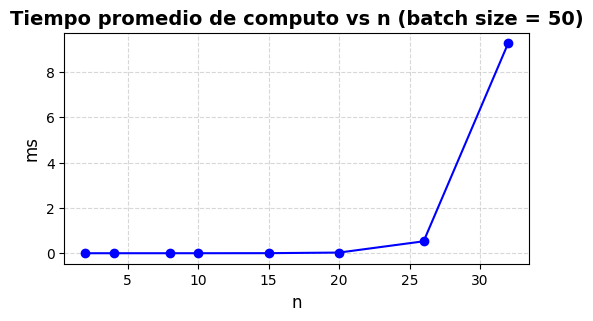

In [ ]:
n_values = []
time_values = []

for n in ns:
    df1 = df[(df["n"] == n) & (df["batch_size"] == 50)].sample(n=100, random_state=42)
    n_values.append(n)
    time_values.append(df1["time_ms"].mean())

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(n_values, time_values, marker='o', linestyle='-', color='b')
ax.set_xlabel('n', fontsize=12)
ax.set_ylabel('ms', fontsize=12)
ax.set_title('Tiempo promedio de computo vs n (batch size = 50)', fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()


La función de Fibonacci, como se puede ver en el gráfico tiene una complejidad exponencial con respecto a la entrada. Esto quiere decir que si la entrada es T(n) la función va a tardar (2^n) en computarse. Por lo tanto la dependencia de estas dos variables no es lineal. <br>
Es por esto que si queremos utilizar herramientas de regresión lineal primero debemos linealizar nuestros datos <br>
Una manera común de hacer esto es por medio del logaritmo y la relación se modela por medio de la siguiente formula: <br> <br>
$$\ln t = \beta_0 + \beta_1 n + \epsilon$$

                        

Primero conseguimos el logaritmo de los datos y graficamos

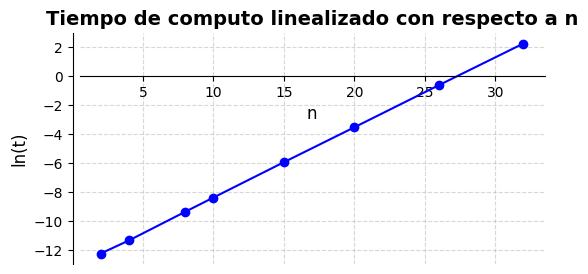

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(n_values, np.log(time_values), marker='o', linestyle='-', color='b')

ax.set_xlabel('n', fontsize=12)
ax.set_ylabel('ln(t)', fontsize=12)
ax.set_title('Tiempo de computo linealizado con respecto a n', fontsize=14, fontweight='bold')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True, linestyle='--', alpha=0.5)
plt.show()


Neceito conseguir el $\beta_0$ y el $\beta_1$ que mejor aproxima a la recta graficada.
$$
\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$


Modelo lineal: ln(t) = -13.2241 + 0.4835 * n


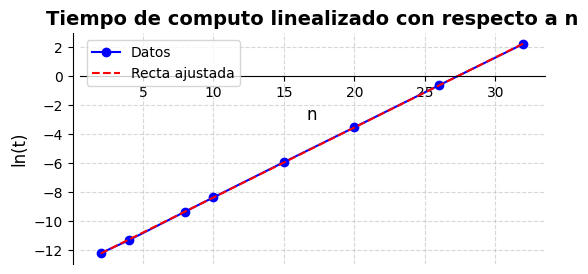

In [ ]:
ln_values = np.log(time_values)
mean_n = np.mean(n_values)
mean_time = np.mean(ln_values)
numerator = 0
denominator = 0

for i in range(len(n_values)):
    numerator += (n_values[i] - mean_n) * (ln_values[i] - mean_time)
    denominator += (n_values[i] - mean_n) ** 2

beta1 = numerator / denominator
beta0 = mean_time - beta1 * mean_n

print("Modelo lineal: ln(t) = {:.4f} + {:.4f} * n".format(beta0, beta1))

ln_fit = beta0 + beta1 * np.array(n_values)

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(n_values, ln_values, marker='o', linestyle='-', color='blue', label='Datos')

ax.plot(n_values, ln_fit, linestyle='--', color='red', label='Recta ajustada')

ax.set_xlabel('n', fontsize=12)
ax.set_ylabel('ln(t)', fontsize=12)
ax.set_title('Tiempo de computo linealizado con respecto a n', fontsize=14, fontweight='bold')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.show()

Una vez conseguida la recta que mejor aproxima a los datos tratemos de estimar t(n)~ O(a^n) para algún n desconocido.<br>
Supongamos n = 32 <br>
Despejamos simplemente t de nuestra ecuación y obtenemos t estimado por nuestra recta <br>
$$
t_{\text{pred}} = e^{\beta_0 + \beta_1 n}
$$




In [ ]:
t_pred = np.exp(beta0 + beta1 * 32 )
print("prediccion t:", t_pred)
print("original t:", time_values[7])


prediccion t: 9.48115474264583
original t: 9.27232118


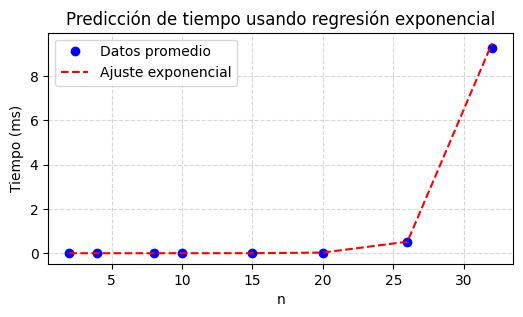

In [ ]:
predicted_values = []
for n in n_values:
  predicted_values.append(np.exp(beta0 + beta1 * n))


fig, ax = plt.subplots(figsize=(6,3))
ax.plot(n_values, time_values, 'o', color='blue', label='Datos promedio')
ax.plot(n_values, predicted_values, '--', color='red', label='Ajuste exponencial')
ax.set_xlabel('n')
ax.set_ylabel('Tiempo (ms)')
ax.set_title('Predicción de tiempo usando regresión exponencial')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.show()



La predicción tiene una diferencia muy significativa con el valor real del tiempo para n = 32 y batch size = 50. Esto puede deberse ya que tenemos pocos n para poder generar un modelo que prediga una tasa de acierto alta. La linealización es muy susceptible a outliers y puede que esa sea otra razon.

## Trabajo a futuro
Como trabajo futuro, nos gustaría poder analizar el comportamiento del algoritmo para valores de n más grandes y verificar si nuestras hipótesis sobre
la tendencia de los tiempos a seguir una distribución normal para
n elevados son correctas. Además, sería interesante explorar distintos tipos de regresión lineal, cuadrática u otra, para determinar cuál se ajusta mejor a nuestros datos. Por último, queda pendiente la implementación de bootstrapping, lo que permitiría responder nuevas preguntas y extraer más información de nuestro conjunto de datos.

# Uso de IA en el trabajo

- No utilizamos herramientas de IA para realizar ningún desarrollo.
- En este trabajo utilizamos Claude para producir código de gráficos.
- En este trabajo utilizamos Claude para revisar el funcionamiento de ciertas celdas de código.
